<a href="https://colab.research.google.com/github/DeekshaM7/CodeTech_DS_T1/blob/main/CodeTech_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CODETECH INTERNSHIP

DEEKSHA MANDAL

# TASK ONE: EXPLORATORY DATA ANALYSIS (EDA)

Start with a dataset of your choice and perform EDA using libraries like pandas, numpy, and matplotlib or seaborn.

Explore the data's characteristics, distributions, correlations,
and outliers.

Visualize your findings with histograms, scatter plots, and heatmaps to
gain insights into the data.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_dataset.csv to heart_disease_dataset (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
df= pd.read_csv('/content/heart_disease_dataset (1).csv')

In [ ]:
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


# Let's explore the dataset

In [ ]:
print('Shape of the dataset', df.shape)
print('\n')
print('Information about columns and datatypes:', df.info())
print('\n')
print('columns with null values in percentage', round(100*df.isna().sum()/len(df),2))
print('\n')
print('Descriptive stats of the data:', df.describe())

Shape of the dataset (1000, 16)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           660 non-null    object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest P

# Data Preprocessing

Counting everyone's alcohol intakes.

In [ ]:
df['Alcohol Intake'].value_counts()

Alcohol Intake
Heavy       346
Moderate    314
Name: count, dtype: int64

Lets consider that the null values in this column are also moderate drinkers.

In [ ]:
df['Alcohol Intake'].fillna('NA',inplace= True)

Let's recheck our column if all the null values have been replaced

In [ ]:
categ_cols = ["Gender", "Smoking", "Alcohol Intake", "Family History",
       "Diabetes", "Obesity", "Exercise Induced Angina", "Chest Pain Type",
       "Heart Disease"]

nums = [i for i in df.columns if i not in categ_cols]

In [ ]:
print('Type of values in the Alcohol intake column\n', df['Alcohol Intake'].value_counts())

Type of values in the Alcohol intake column
 Alcohol Intake
Heavy       346
NA          340
Moderate    314
Name: count, dtype: int64


Let's see what ages of people we have

In [ ]:
print('Youngest in the dataset is of age', min(df.Age))
print('Oldest in the dataset is of age', max(df.Age))

youngest in the dataset is of age 25
Oldest in the dataset is of age 79



Creating categorical columns separately so that we can create a function to show all graphs at once.

In [ ]:
categ_cols= [x for x in df.columns if df[x].dtype == 'object']
categ_cols

['Gender',
 'Smoking',
 'Alcohol Intake',
 'Family History',
 'Diabetes',
 'Obesity',
 'Exercise Induced Angina',
 'Chest Pain Type']

In [ ]:
def cat_graphs(ax, c):
    sns.countplot(data=df, x='Heart Disease', hue= c, ax=ax)
    ax.set_title(f'Countplot for Heart Disease by {c}')

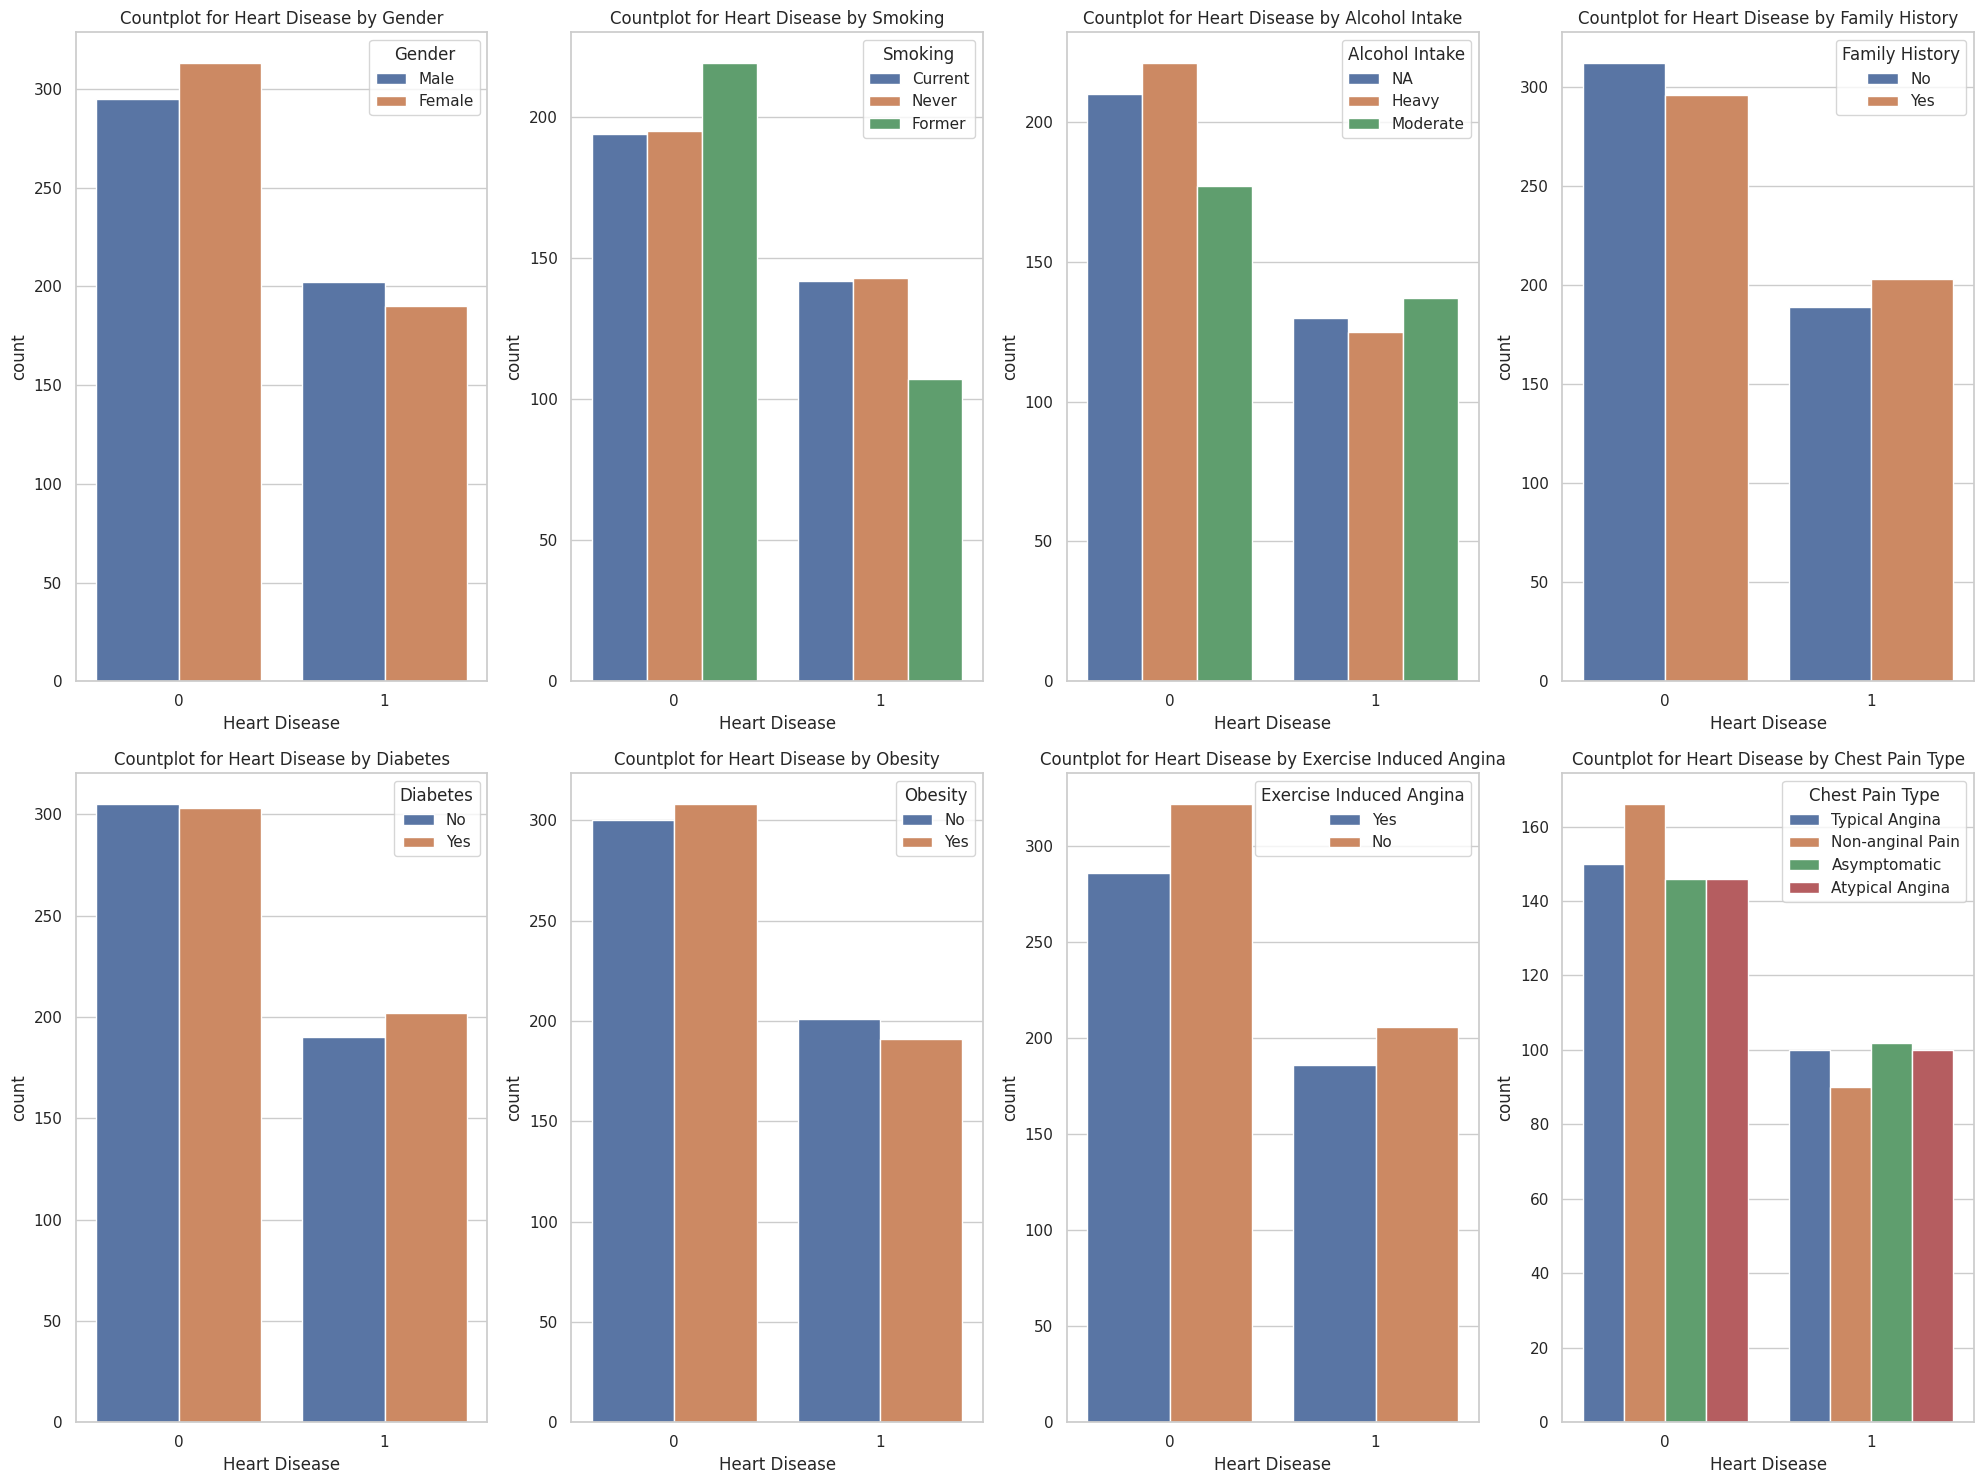

In [ ]:
n_row=2
n_col=4
fig, axs = plt.subplots(n_row, n_col, figsize=(20,15))  # Create a 2x4 grid of subplots

for ax, col in zip(axs.flatten(), cat_cols):
    cat_graphs(ax, col)

plt.tight_layout()
plt.show()

#for i in cat_cols:
 #   cat_graphs(i)

# Inferences from the data:

1. Males are at higher risk of heart disease.
2. Those who have never smoked have a higher rate of heart disease, and the lowest rate is in those who are former smokers.
People who have a family history of heart disease are more likely to develop it.
3. Diabetics are more likely to get heart disease.

Analyze distributions of numerical features

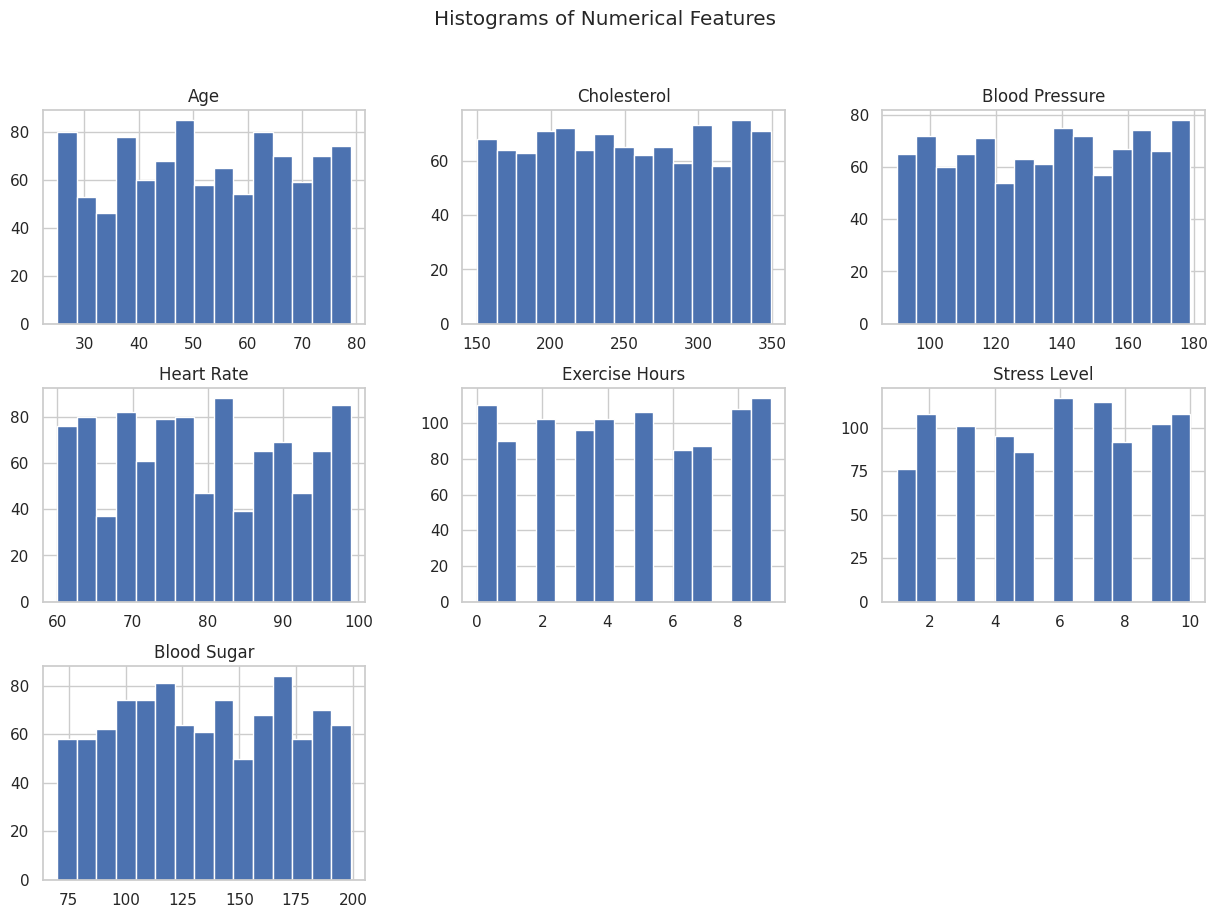

In [ ]:
# Histograms of numerical features
numerical_features = ['Age', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Exercise Hours', 'Stress Level', 'Blood Sugar']

df[numerical_features].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numerical Features')
plt.show()

Identify and visualize outliers

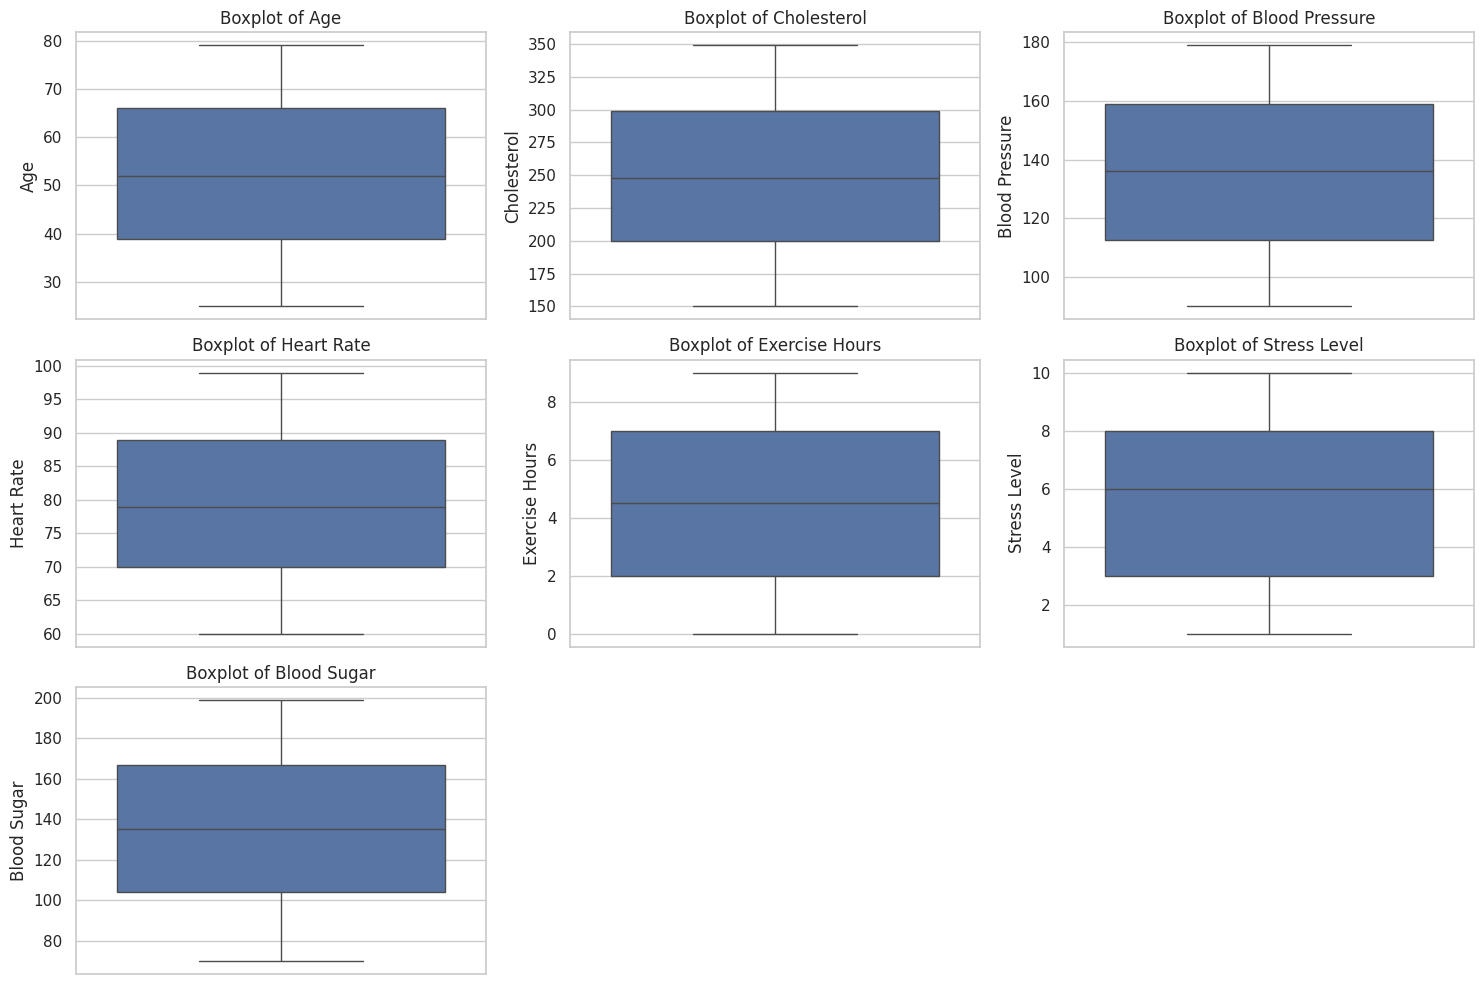

In [ ]:
# Boxplots to identify outliers in numerical features
plt.figure(figsize=(15, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=feature, data=df)
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

Influence of different categorical values on presence of heart disease

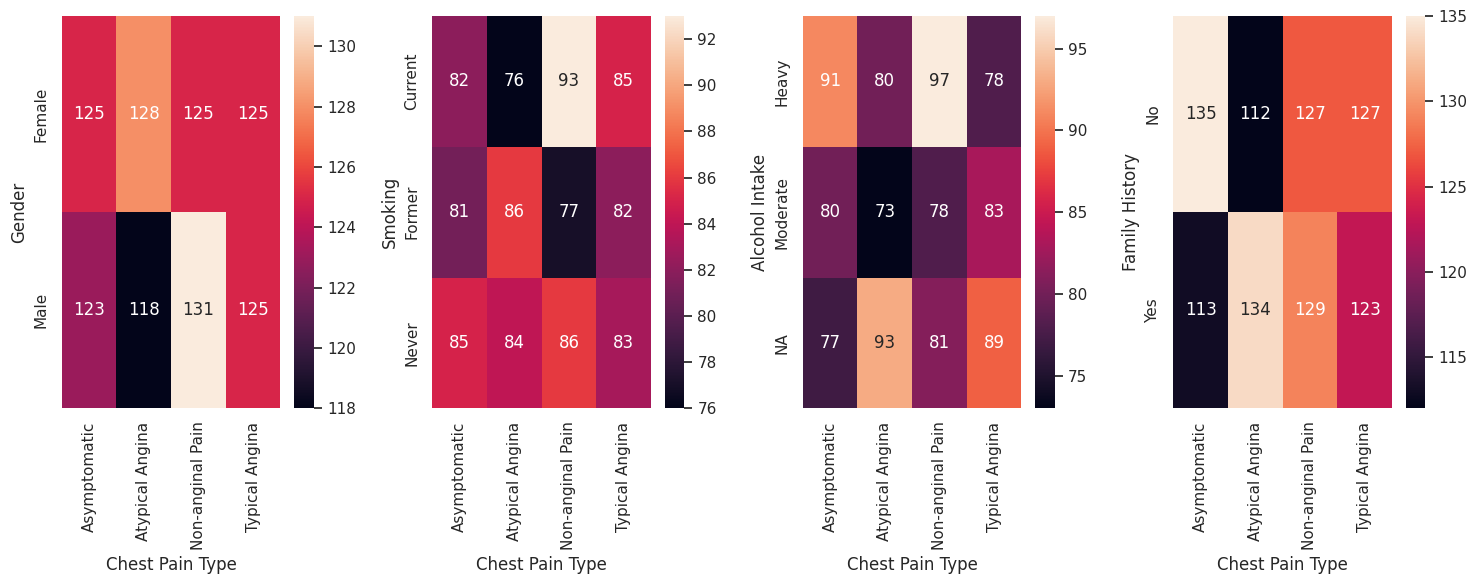

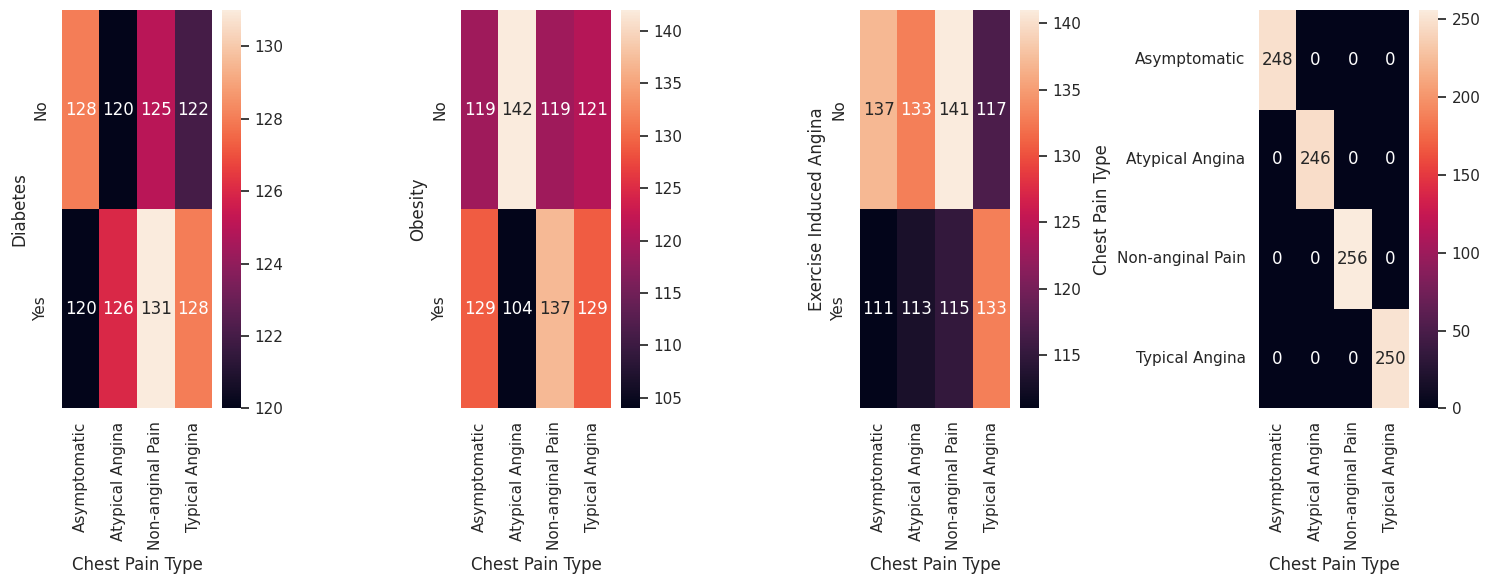

In [ ]:
index = 0
for i in range(2):
    fig, axes = plt.subplots(ncols=4, figsize=(15, 6))
    for j in range(4):
        sns.heatmap(pd.crosstab(df[categ_cols[index]], df[categ_cols[-1]]), annot=True, ax=axes[j], fmt='d')
        index += 1
    plt.tight_layout()
    plt.show()

Numerical data distribution among patients with and without heart disease

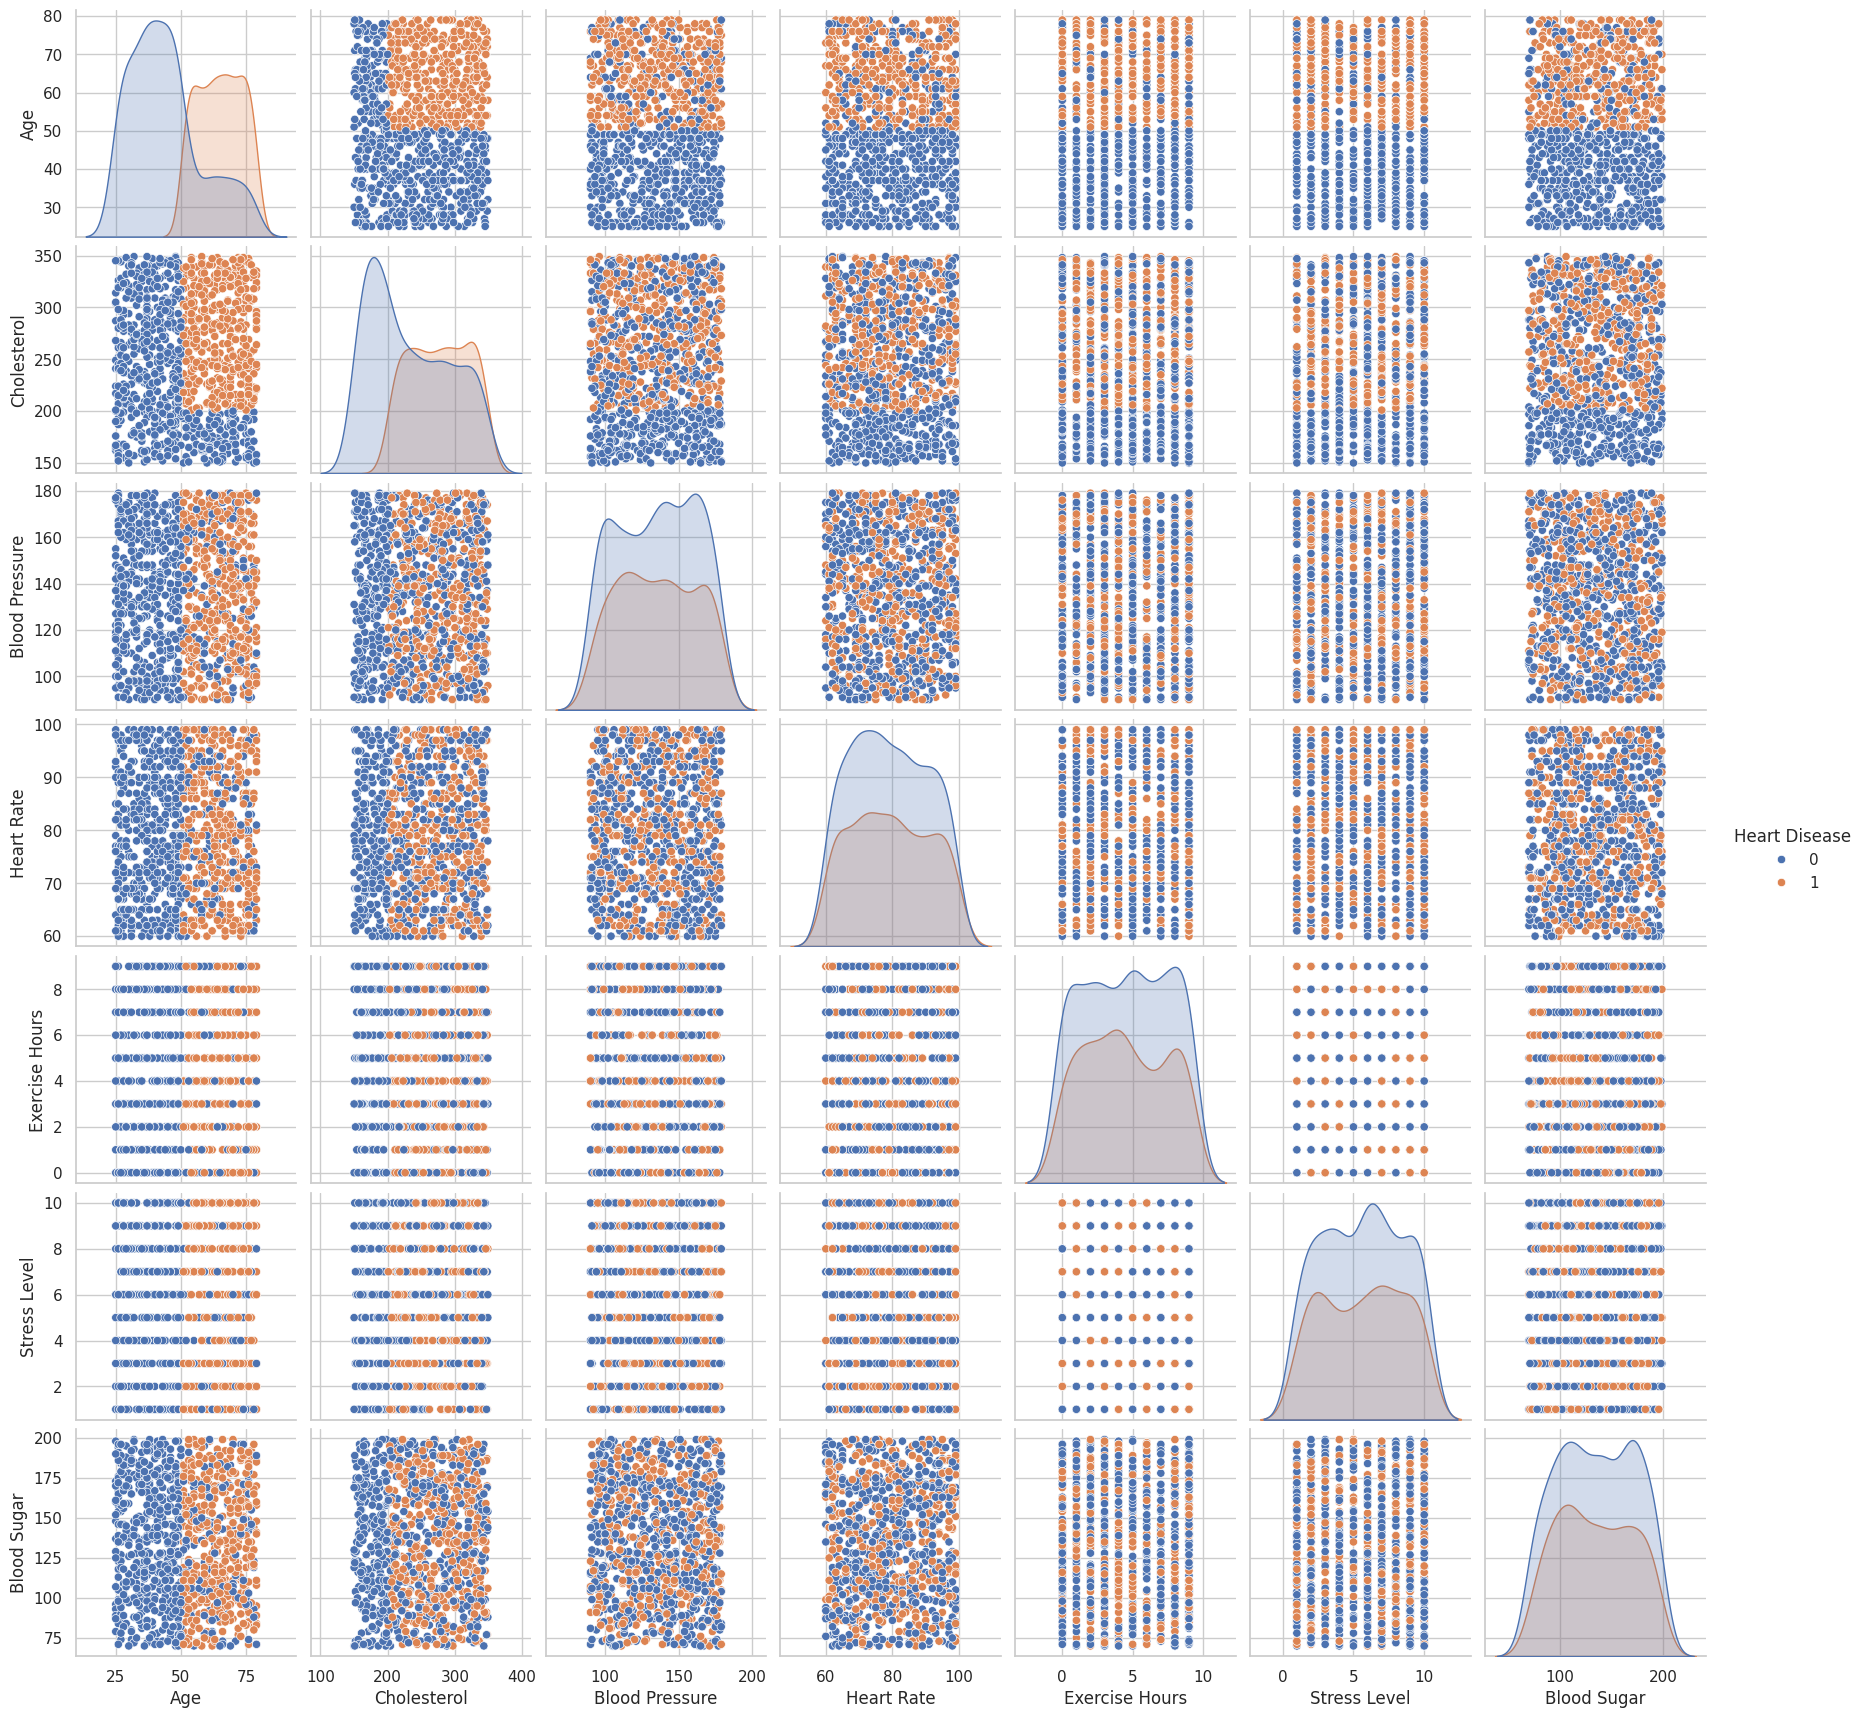

In [ ]:
sns.pairplot(df, vars=nums, hue=categ_cols[-1])
plt.show()

Let's understand the numerical columns with some more visualizations

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['Age',
 'Cholesterol',
 'Blood Pressure',
 'Heart Rate',
 'Exercise Hours',
 'Stress Level',
 'Blood Sugar',
 'Heart Disease']

In [ ]:
#Remove heart disease column name from the numerical columns becuse it's the target variable
num_cols.remove('Heart Disease')

Age
Skew : -0.03


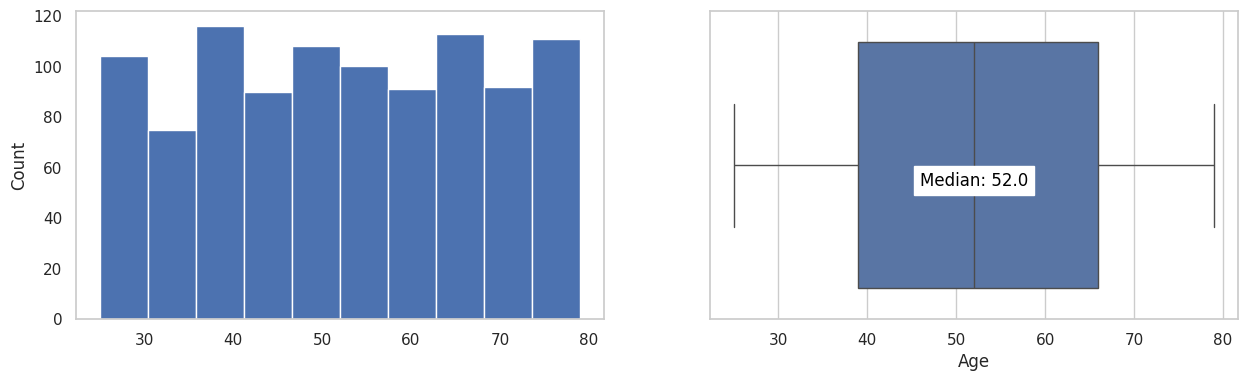

Cholesterol
Skew : 0.01


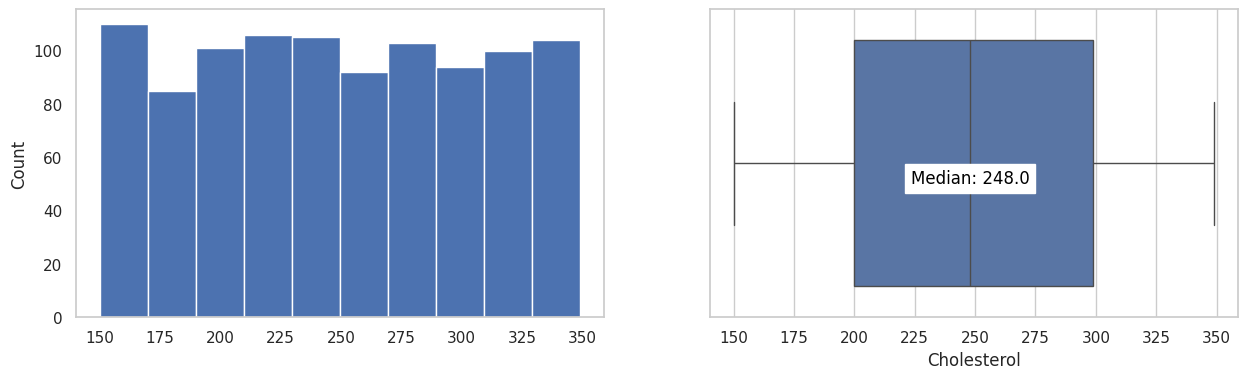

Blood Pressure
Skew : -0.04


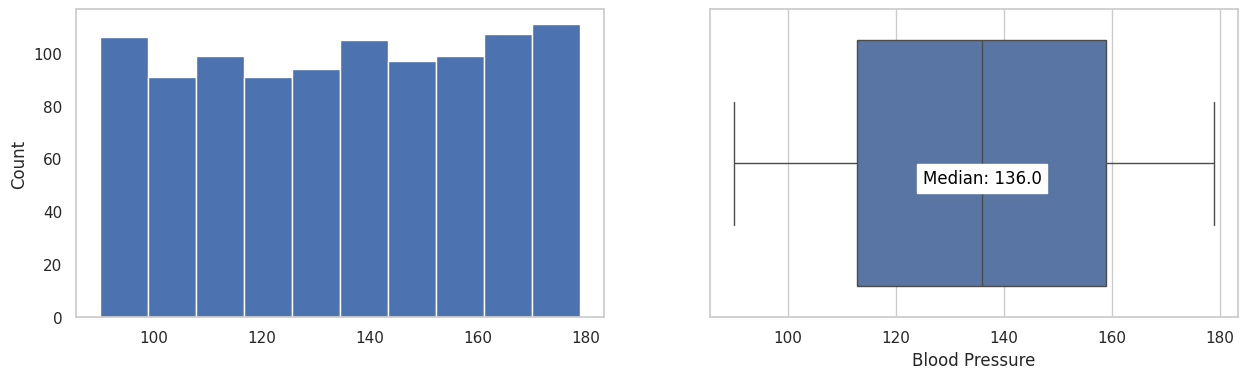

Heart Rate
Skew : 0.08


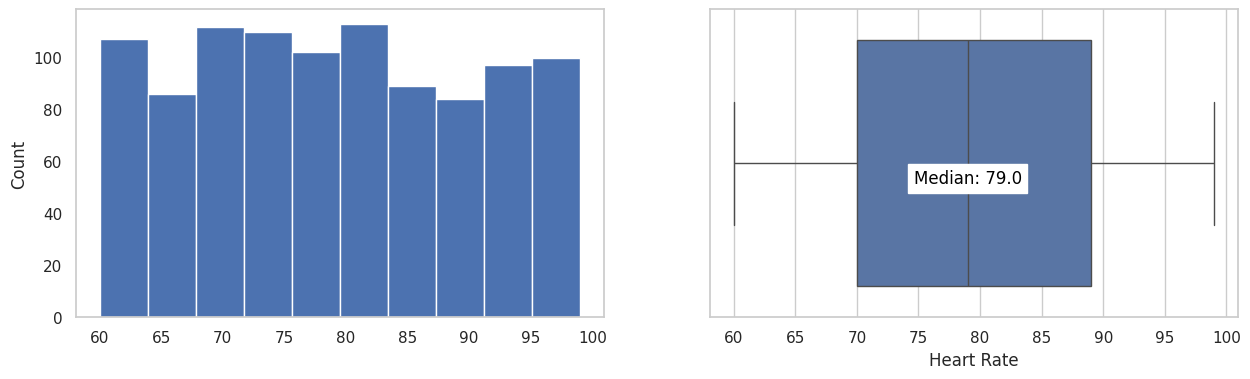

Exercise Hours
Skew : 0.0


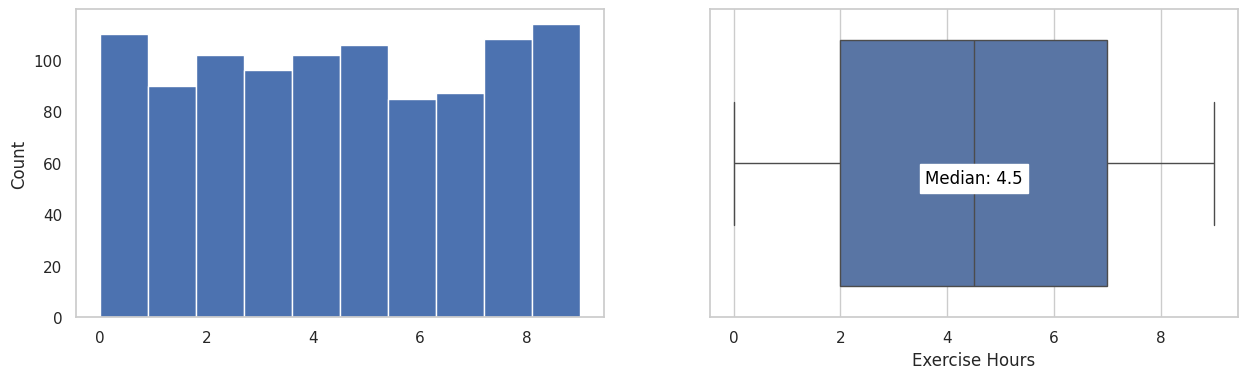

Stress Level
Skew : -0.04


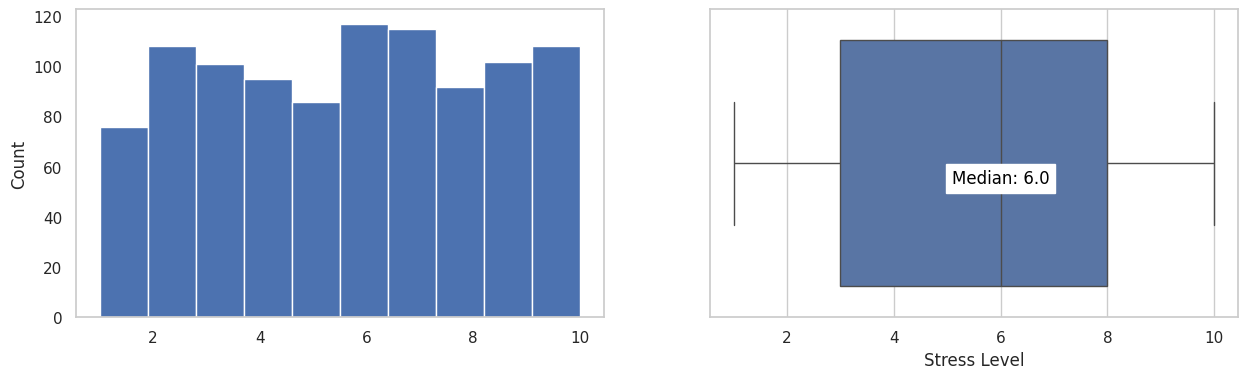

Blood Sugar
Skew : 0.01


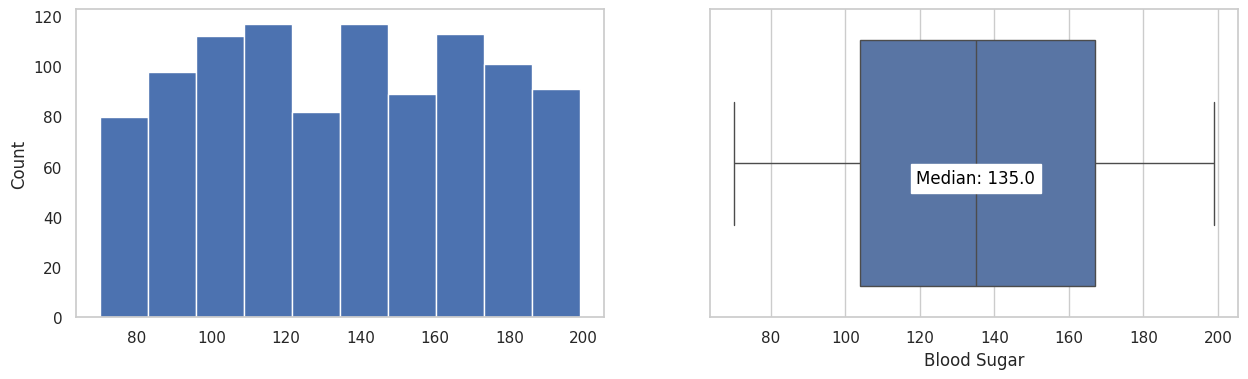

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))

    # Create the figure
    plt.figure(figsize=(15, 4))

    # Histogram subplot
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('Count')

    # Boxplot subplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])

    # Calculate the median
    median = df[col].median()

    # Add the median label to the box plot
    plt.text(median, 0.05, f'Median: {median}', color='black', ha='center', va='center', backgroundcolor='white')

    # Display the plots
    plt.show()

# Inferences from the Numerical data analysis:
1. Numerical data analysis gives insights into median values and skewness.
2. Columns with zero skewness indicate that the mean and median values are the same.
3. The average cholesterol levels are high in the sample data.

In [ ]:
y= df['Heart Disease']

In [ ]:
#checking heart disease rate
rate_of_heart_disease= 100* sum(y)/len(y)
rate_of_heart_disease

39.2

We have heart disease rate of 39.2 percent.